### Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.

### Loading Required libraries and dataset

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from patsy import dmatrices 
from sklearn.linear_model  import LogisticRegression 
from  sklearn.model_selection  import train_test_split 
from sklearn  import metrics 
from  sklearn.model_selection  import cross_val_score

In [2]:
dta=sm.datasets.fair.load_pandas().data

In [3]:
#add "affair" column: 1 represents having affairs, 0  represents not 
dta['affair'] = (dta.affairs>  0).astype(int) 

### Preprocessing 

In [4]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [5]:
dta.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0,0


In [6]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [7]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [8]:
dta.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614,0.017637
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000,0.464046
affair,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,0.464046,1.000000


### Checking Missing values

In [9]:
dta.isna().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

### Visualizing data with heatmap and pairplot

<AxesSubplot:>

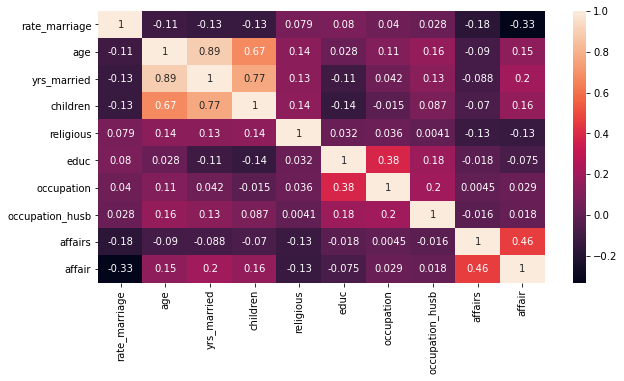

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(dta.corr(),annot=True)

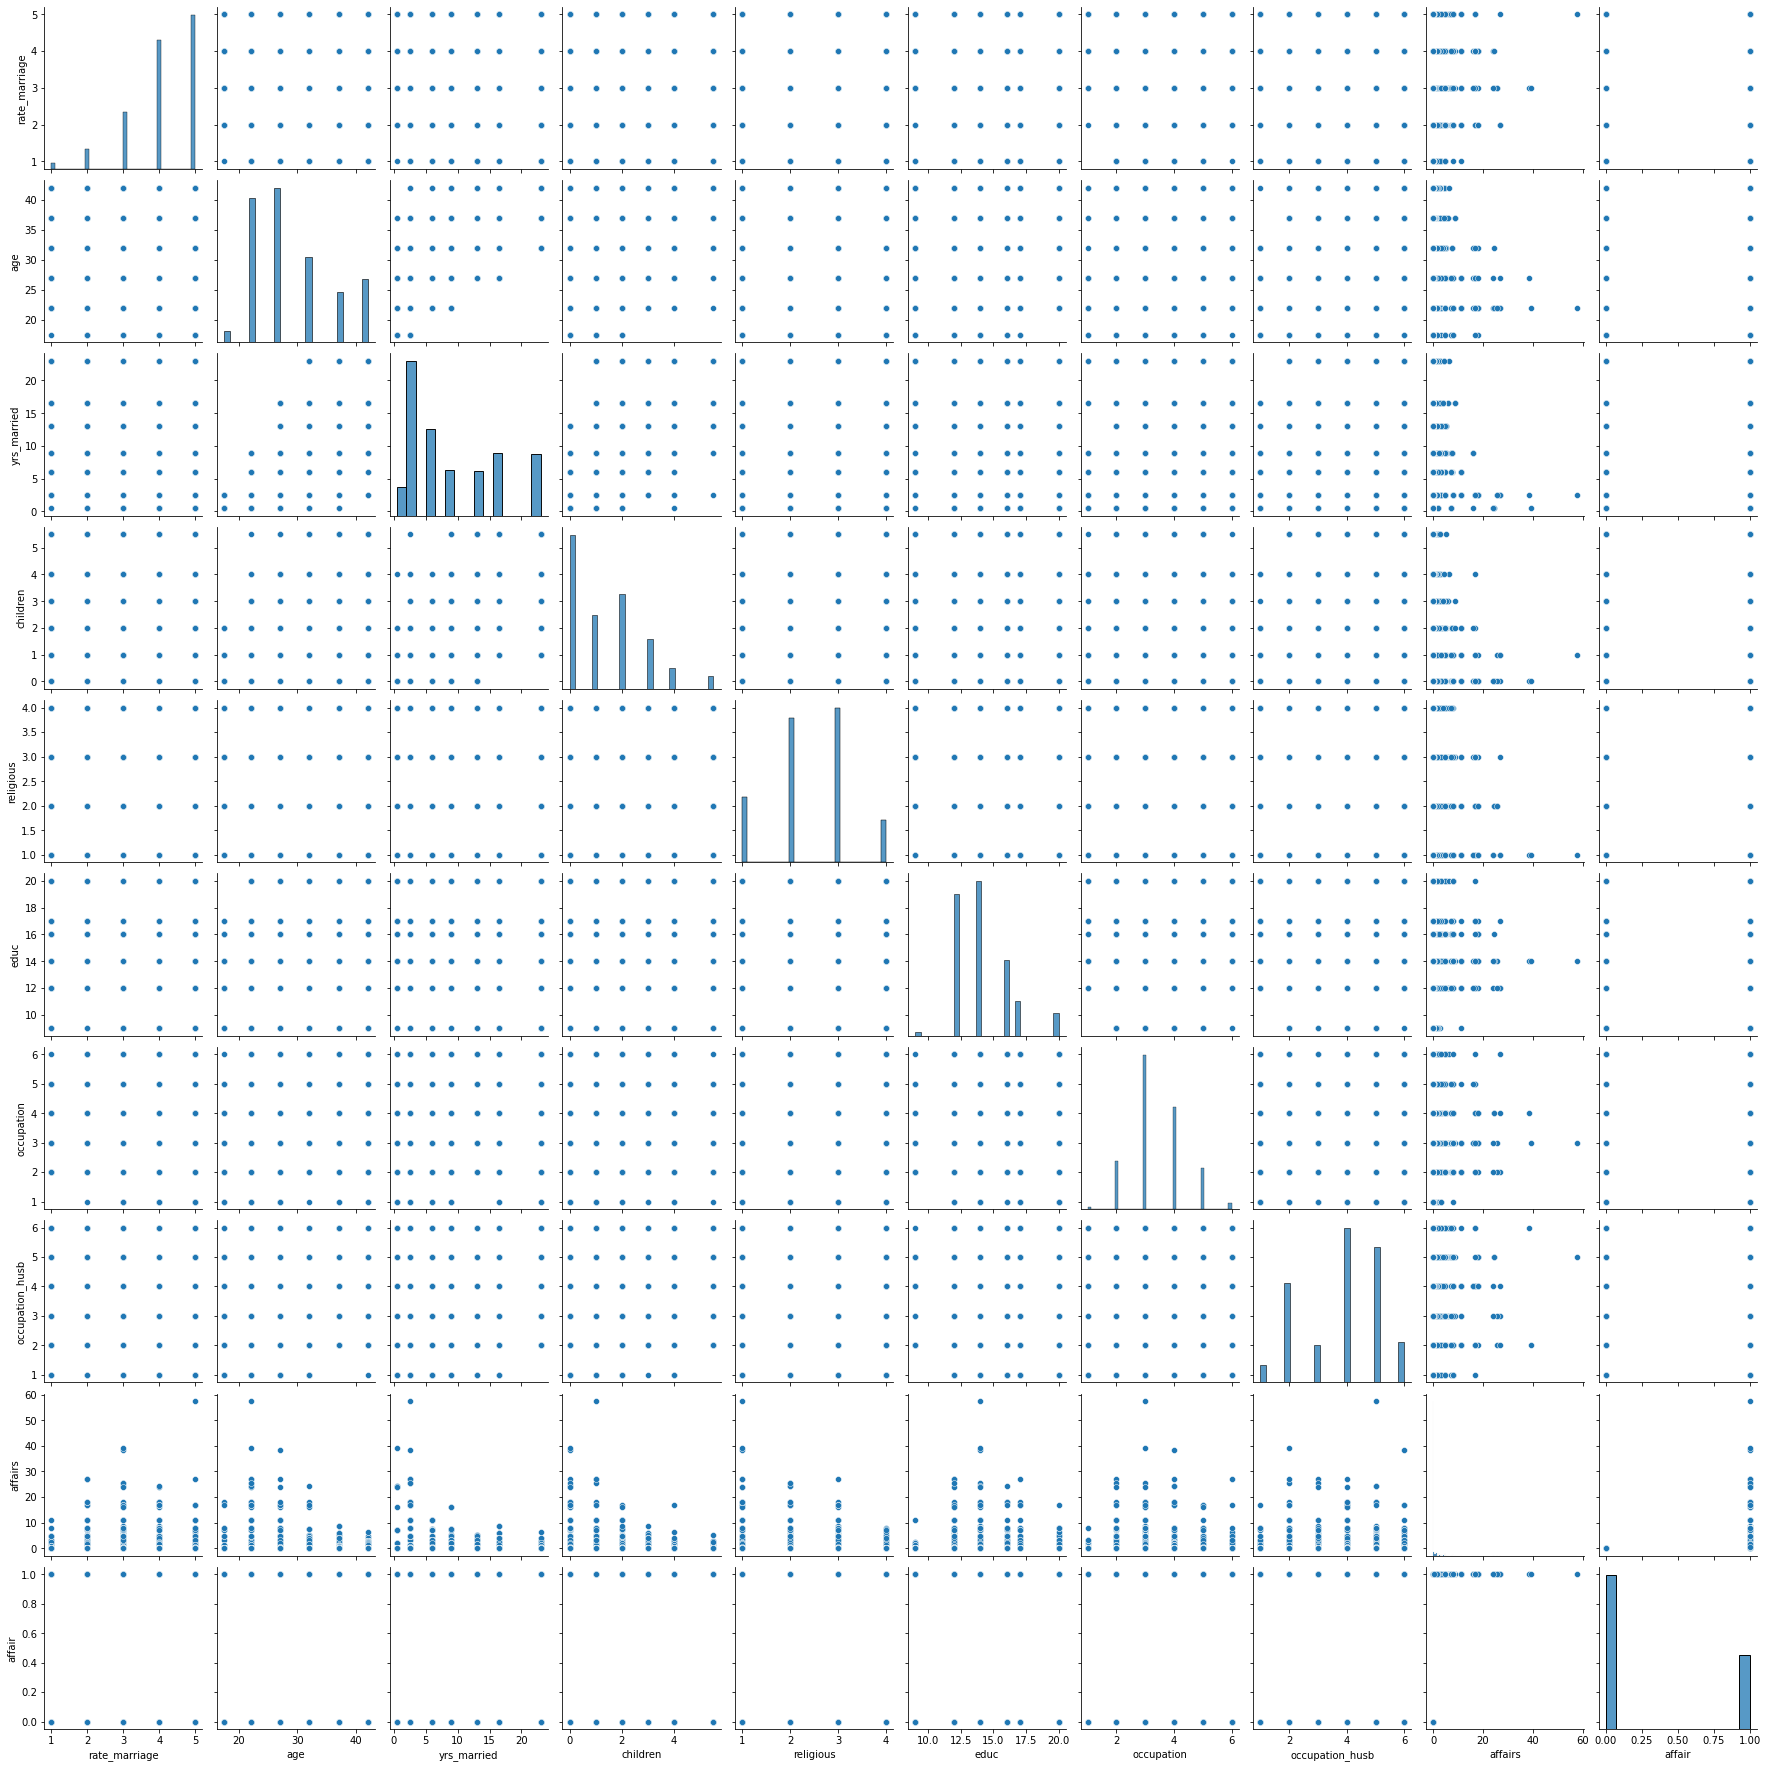

In [11]:
sns.pairplot(data=dta)

### Spliting data and Training

In [12]:
y, X = dmatrices('affair ~ rate_marriage + age +  yrs_married + children +  religious + educ +  C(occupation) + C(occupation_husb)', dta, return_type="dataframe") 
X = X.rename(columns =  
{'C(occupation)[T.2.0]':'occ_2', 
'C(occupation)[T.3.0]':'occ_3', 
'C(occupation)[T.4.0]':'occ_4', 
'C(occupation)[T.5.0]':'occ_5', 
'C(occupation)[T.6.0]':'occ_6', 
'C(occupation_husb)[T.2.0]':'occ_husb_2', 
'C(occupation_husb)[T.3.0]':'occ_husb_3', 
'C(occupation_husb)[T.4.0]':'occ_husb_4', 
'C(occupation_husb)[T.5.0]':'occ_husb_5', 
'C(occupation_husb)[T.6.0]':'occ_husb_6'}) 
y = np.ravel(y)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2)

### Applying Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\manisha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
ypred=model.predict(X_test)
ypred

array([0., 0., 1., ..., 0., 0., 1.])

### Model Evaluation

In [16]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,ypred)
acc

0.7315541601255887

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypred)
cm

array([[788,  77],
       [265, 144]], dtype=int64)

<AxesSubplot:>

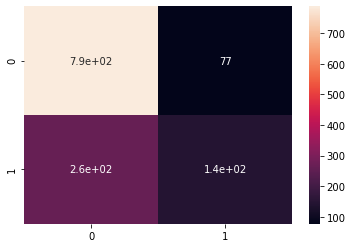

In [18]:
sns.heatmap(cm,annot=True)

In [19]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82       865
         1.0       0.65      0.35      0.46       409

    accuracy                           0.73      1274
   macro avg       0.70      0.63      0.64      1274
weighted avg       0.72      0.73      0.70      1274



In [20]:
X_test

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
3339,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,22.0,2.5,2.0,3.0,12.0
541,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,27.0,9.0,2.0,3.0,12.0
4219,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,32.0,16.5,4.0,2.0,12.0
3394,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,22.0,0.5,0.0,2.0,16.0
3077,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,32.0,13.0,1.0,3.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,37.0,23.0,3.0,3.0,12.0
967,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,27.0,2.5,0.0,3.0,20.0
2777,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,27.0,2.5,0.0,3.0,14.0
2705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,17.5,2.5,0.0,1.0,12.0


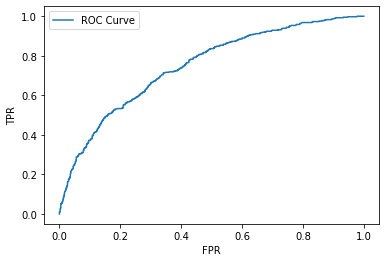

In [21]:
from sklearn import metrics 
ypred_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,_=metrics.roc_curve(y_test,ypred_prob)
auc=metrics.roc_auc_score(y_test,ypred_prob)
plt.plot(fpr,tpr,label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [22]:
auc

0.7479740520372542